SUMMARY-
Customer Churn Analysis 

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
cc=pd.read_csv('/Users/drram/Documents/bigml_59c28831336c6604c800002a.csv')
cc

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [4]:
cc.shape

(3333, 21)

In [5]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
cc.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [9]:
#finding null values
cc.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

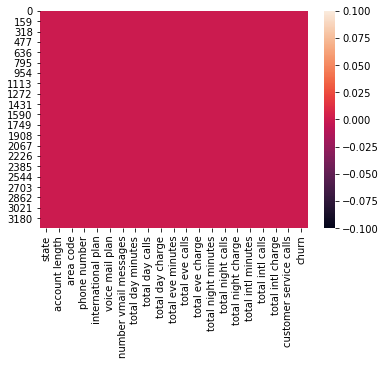

In [8]:
sns.heatmap(cc.isnull())

In [10]:
#checking the no. of unique values


col_name=[]
unique_value=[]

for i in cc.columns:
    col_name.append(str(i))
    unique_value.append(cc[i].nunique())

tablecc=pd.DataFrame()
tablecc['column_name']=col_name
tablecc['Value']=unique_value

tablecc=tablecc.sort_values('Value', ascending=False)
tablecc

,column_name,Value
3,phone number,3333
7,total day minutes,1667
9,total day charge,1667
10,total eve minutes,1611
13,total night minutes,1591
12,total eve charge,1440
15,total night charge,933
1,account length,212
18,total intl charge,162
16,total intl minutes,162


In [11]:
#checking the unique values in the dataset
for i in cc.columns:
    print(cc[i].value_counts())
    print()

WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
WY     77
VA     77
CT     74
VT     73
ID     73
MI     73
UT     72
TX     72
IN     71
KS     70
MD     70
NJ     68
MT     68
NC     68
CO     66
WA     66
NV     66
MS     65
MA     65
RI     65
AZ     64
MO     63
FL     63
NM     62
ME     62
ND     62
NE     61
DE     61
OK     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: account length, Length: 212, dtype: int64

415    1655
510     840
408     838
Name: area code, dtype: int64

411-4582    1
330-4364    1
363-5819    1
398-8578    1
354-8914    1
           ..
411-5958    1
362-4685    1
383-4061    1
408-4323    1
415-3120    1
Name: phone number, Length: 3333, dtype: int64

no     3010
yes     323
Name: inter

In [12]:
cc.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

#Bivariate Analysis

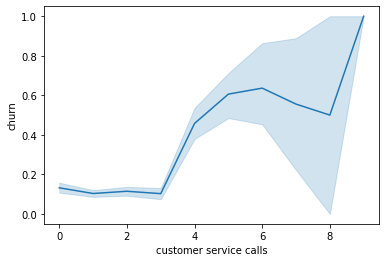

In [15]:
sns.lineplot(x='customer service calls', y='churn', data=cc)

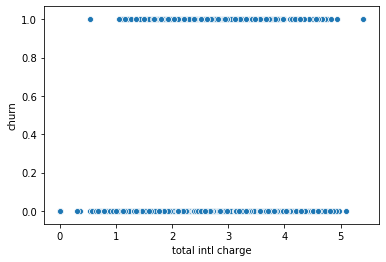

In [17]:
sns.scatterplot(x='total intl charge', y='churn', data=cc)

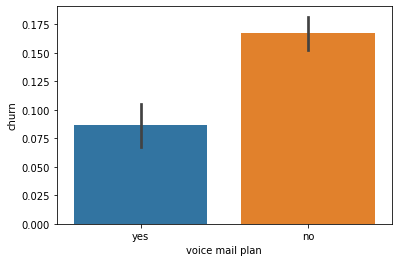

In [18]:
sns.barplot(x='voice mail plan', y='churn', data=cc)

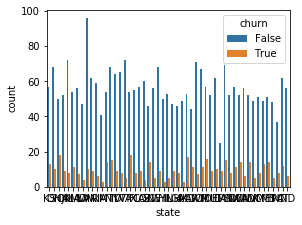

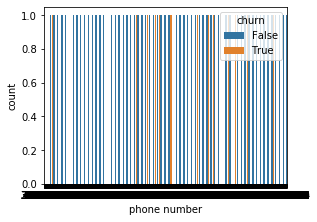

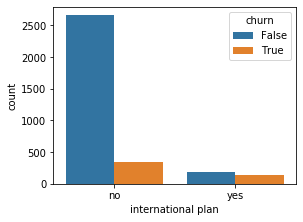

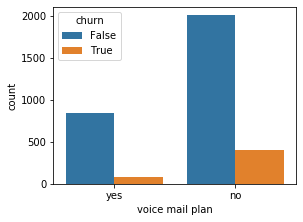

In [20]:
#checking the count plot of categorical variables along with camparison to Churn
for i in cc.columns:
    if cc[i].dtype=='O':
        plt.figure(figsize=(20,15))
        plt.subplot(4,4,2)
        sns.countplot(cc[i], hue=cc['churn'])
        plt.show()

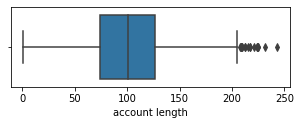

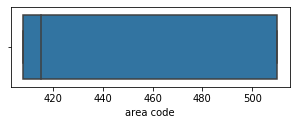

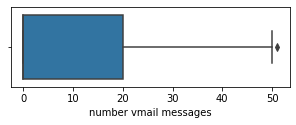

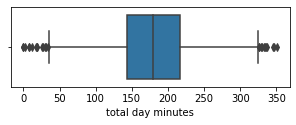

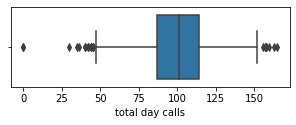

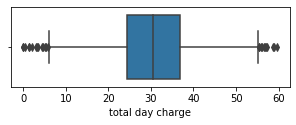

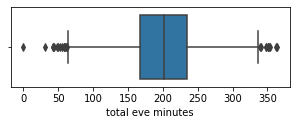

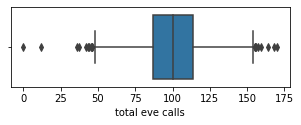

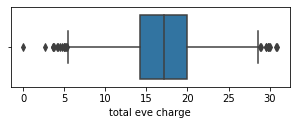

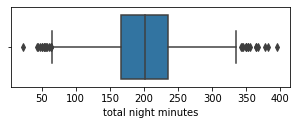

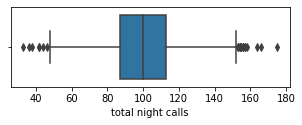

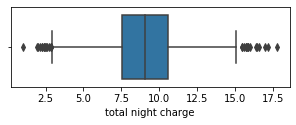

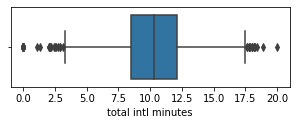

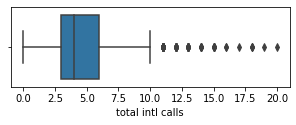

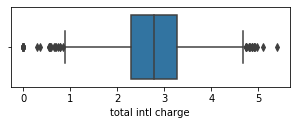

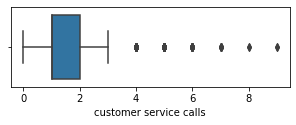

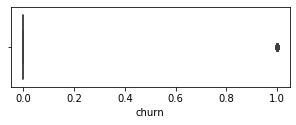

In [24]:
# checking the outliers using boxplot
for i in cc.columns:
    if cc[i].dtypes!='O':
        plt.figure(figsize=(5,5))
        plt.subplot(3,1,3)
        sns.boxplot(cc[i])

#Statisrical Analysis

In [26]:
cc.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


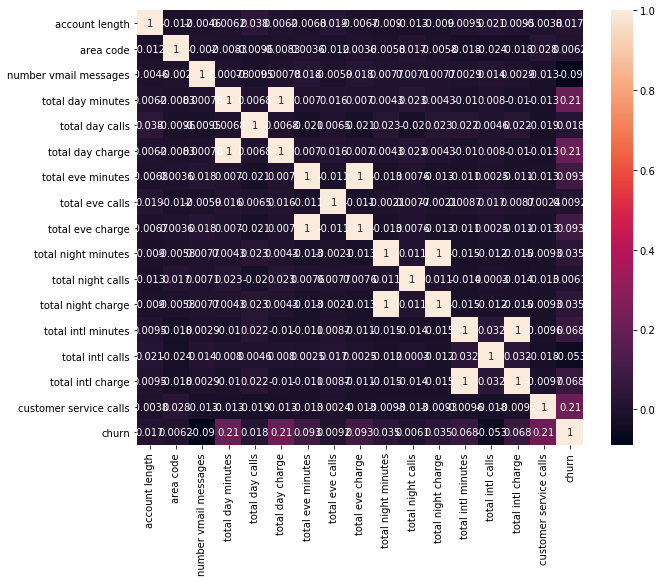

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(cc.corr(), annot=True)

In [31]:
cc.corr()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


In [38]:
cc1=cc.drop('phone number', axis=1)
cc1.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,32,1,0,1,16,1305,11,1455,695,122,557,1117,111,102,3,14,79,1,0
1,35,9,1,0,1,17,476,24,627,676,4,541,1198,3,146,40,14,116,1,0
2,31,42,1,0,0,0,1175,15,1326,86,11,23,375,4,668,25,16,101,0,0
3,35,195,0,1,0,0,1441,90,1593,1551,111,1325,690,109,821,128,18,45,2,0
4,36,185,1,1,0,0,520,14,671,258,24,180,596,21,777,4,14,80,3,0


LABELENCODING

In [40]:
#### encoding the data
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

for i in cc1.columns:
    if cc1.columns.dtype=='O':
        cc1[i]=lb.fit_transform(cc1[i].astype(str))

In [41]:
cc1.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,8,138,1,0,1,8,342,13,508,1273,27,949,133,15,5,85,6,139,1,0
1,29,201,1,0,1,9,1086,36,1254,1252,57,932,222,43,53,97,6,20,1,0
2,25,149,1,0,0,0,197,26,365,1456,13,586,898,54,632,80,8,4,0,0
3,29,107,0,1,0,0,493,109,661,615,15,364,1248,12,803,33,10,102,2,0
4,30,96,1,1,0,0,1136,25,1303,788,40,531,1143,34,753,96,6,141,3,0


#### removing outliers

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(cc1))
print("The datashape before removing outliers is ", cc1.shape)
cc1=cc1[(z<3).all(axis=1)]
print("The datashape after removing outliers is ", cc1.shape)

The datashape before removing outliers is  (3333, 20)
The datashape after removing outliers is  (2887, 20)


###checking skewness

In [43]:
cc1.skew()

state                    -0.048082
account length           -0.182391
area code                 0.011266
international plan        0.000000
voice mail plan           1.102325
number vmail messages     1.906895
total day minutes        -0.379859
total day calls           0.833758
total day charge         -0.266306
total eve minutes        -0.300409
total eve calls           0.995824
total eve charge         -0.375501
total night minutes      -0.288163
total night calls         0.854469
total night charge       -0.521600
total intl minutes        0.314732
total intl calls          0.023801
total intl charge        -0.779057
customer service calls    0.717642
churn                     2.491757
dtype: float64

In [44]:
#Using sqrt function to remove the skewness
for i in cc1.columns:
    if cc1.skew()[i]>0.55:
        cc1[i]=np.sqrt(cc1[i])

In [45]:
cc1.skew()

state                    -0.048082
account length           -0.182391
area code                 0.011266
international plan        0.000000
voice mail plan           1.102325
number vmail messages     1.390049
total day minutes        -0.379859
total day calls           0.299944
total day charge         -0.266306
total eve minutes        -0.300409
total eve calls           0.354772
total eve charge         -0.375501
total night minutes      -0.288163
total night calls         0.212817
total night charge       -0.521600
total intl minutes        0.314732
total intl calls          0.023801
total intl charge        -0.779057
customer service calls   -0.504032
churn                     2.491757
dtype: float64

##Splitting the data into target and input variables

In [46]:
x=cc1.drop('churn', axis=1)
x.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,8,138,1,0,1.0,2.828427,342,3.605551,508,1273,5.196152,949,133,3.872983,5,85,6,139,1.000000
1,29,201,1,0,1.0,3.000000,1086,6.000000,1254,1252,7.549834,932,222,6.557439,53,97,6,20,1.000000
2,25,149,1,0,0.0,0.000000,197,5.099020,365,1456,3.605551,586,898,7.348469,632,80,8,4,0.000000
6,11,130,2,0,1.0,2.645751,1640,3.162278,141,595,10.583005,344,1406,5.477226,879,43,10,112,1.732051
8,10,113,0,0,0.0,0.000000,1308,4.472136,1476,598,2.449490,348,1438,3.741657,895,56,7,125,1.000000


In [47]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.199868,0.541286,0.011269,0.0,1.692570,1.153226,-1.219735,-0.890696,-0.762689,0.816389,-0.298381,0.373587,-1.552490,-0.724678,-1.907658,0.475763,-0.390029,0.720645,-0.100692
1,0.233011,1.926633,0.011269,0.0,1.692570,1.257308,0.326977,-0.017474,0.705738,0.772532,0.594283,0.330352,-1.364181,0.212669,-1.738199,0.841956,-0.390029,-1.535145,-0.100692
2,-0.039918,0.783172,0.011269,0.0,-0.590818,-0.562610,-1.521178,-0.346049,-1.044170,1.198570,-0.901637,-0.549628,0.066119,0.488878,0.305895,0.323183,0.336900,-1.838445,-1.694993
3,-0.995171,0.365369,1.425818,0.0,1.692570,1.042407,1.478696,-1.052352,-1.485092,-0.599560,1.744653,-1.165105,1.140960,-0.164515,1.177901,-0.805912,1.063830,0.208827,1.066417
4,-1.063403,-0.008455,-1.403279,0.0,-0.590818,-0.562610,0.788496,-0.574665,1.142723,-0.593294,-1.340088,-1.154932,1.208667,-0.770534,1.234387,-0.409203,-0.026564,0.455258,-0.100692


In [48]:
y=pd.DataFrame(cc1.churn)
cc1.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,8,138,1,0,1.0,2.828427,342,3.605551,508,1273,5.196152,949,133,3.872983,5,85,6,139,1.000000,0.0
1,29,201,1,0,1.0,3.000000,1086,6.000000,1254,1252,7.549834,932,222,6.557439,53,97,6,20,1.000000,0.0
2,25,149,1,0,0.0,0.000000,197,5.099020,365,1456,3.605551,586,898,7.348469,632,80,8,4,0.000000,0.0
6,11,130,2,0,1.0,2.645751,1640,3.162278,141,595,10.583005,344,1406,5.477226,879,43,10,112,1.732051,0.0
8,10,113,0,0,0.0,0.000000,1308,4.472136,1476,598,2.449490,348,1438,3.741657,895,56,7,125,1.000000,0.0


#### deriving the best random_state for splitting the data into train and test

In [49]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def max_acc_score(reg,x1,y1):
    max_acc_score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        acc_score=accuracy_score(test_y,pred)
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print("The max accuracy score ", max_acc_score, "is achieved at", final_r_state)
    return final_r_state

In [50]:
#Checking the Logistic Regression for the above
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

max_acc_score(lg,x,y)

The max accuracy score  0.9186851211072664 is achieved at 98


98

In [51]:
#We need to finalise the train and test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=42,test_size=0.20)

We need to check the performance of other modules and their scores. For the same we need to use GridSearchCV to select best parameters for the models


using GridsearchCV to select best parameters

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x,train_y)
gdkn.best_params_



{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x,train_y)
gddt.best_params_

{'criterion': 'gini', 'splitter': 'random'}

In [54]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x,train_y)
gdsv.best_params_

{'C': 1, 'kernel': 'linear'}

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The accuracy score is  0.8979238754325259

The cross val score is 0.8891582160440892

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       520
         1.0       0.00      0.00      0.00        58

    accuracy                           0.90       578
   macro avg       0.45      0.50      0.47       578
weighted avg       0.81      0.90      0.85       578


[[519   1]
 [ 58   0]]

roc_auc_score 0.49903846153846154


AxesSubplot(0.125,0.808774;0.62x0.0712264)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
    

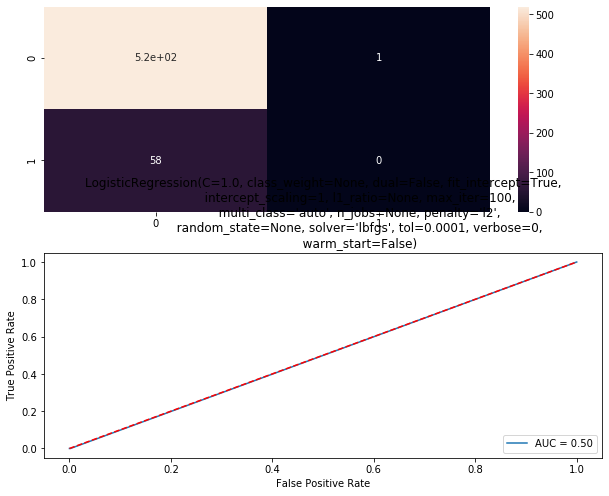

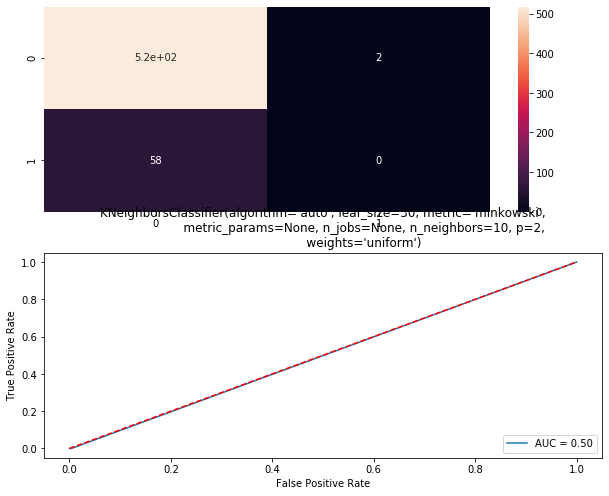

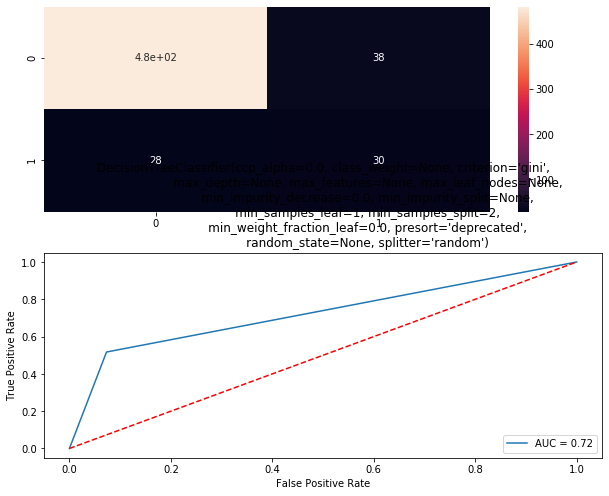

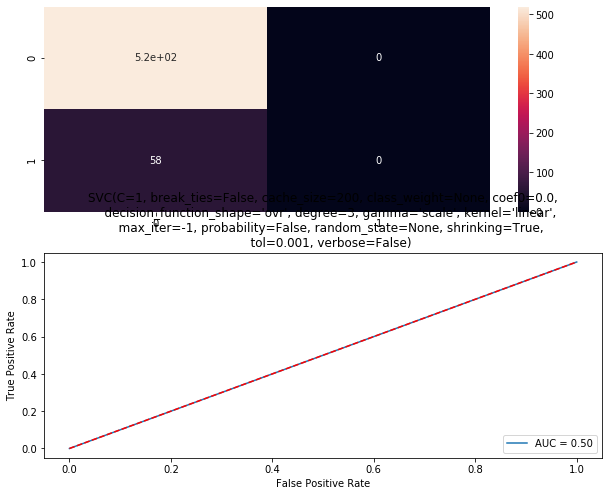

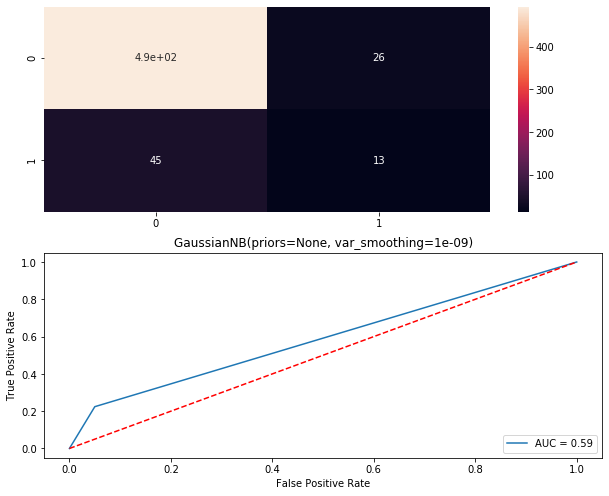

In [55]:
#check the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

score=[]
cv=[]
rocscore=[]


algorithms=[lg,KNeighborsClassifier(algorithm='auto', n_neighbors= 10, weights='uniform'), DecisionTreeClassifier(criterion= 'gini', splitter= 'random'), SVC(C=1, kernel='linear'), GaussianNB()]

for i in algorithms:
    print(i)
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    accscore=accuracy_score(test_y,pred)
    score.append(accscore)
    print("")
    print("The accuracy score is ", accscore)
    print("")
    cvscore=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y,pred))
    print()
    cm=confusion_matrix(test_y,pred)
    print(cm)
    print()
    false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n")
    print("\n")

In [56]:
result1=pd.DataFrame({'Model':[LogisticRegression,KNeighborsClassifier, DecisionTreeClassifier, SVC,GaussianNB],'Accuracy_Score':score,'Cross_val_score':cv, 'AUC_ROC':rocscore})
result1

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model._logistic.Logisti...,0.897924,0.889158,0.499038
1,<class 'sklearn.neighbors._classification.KNei...,0.896194,0.888466,0.498077
2,<class 'sklearn.tree._classes.DecisionTreeClas...,0.885813,0.886044,0.722082
3,<class 'sklearn.svm._classes.SVC'>,0.899654,0.889851,0.500000
4,<class 'sklearn.naive_bayes.GaussianNB'>,0.877163,0.865269,0.587069


ensemble technique

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators':(10,50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y)
gdrf.best_params_

{'n_estimators': 500}

In [58]:
#checking the best accuracy score and random state for RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500)
max_acc_score(rf,x,y)

The max accuracy score  0.9550173010380623 is achieved at 69


69

In [59]:
#checking the cross val score
cs=cross_val_score(rf,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of Random forest classifier is", cs)

The cross val score of Random forest classifier is 0.9404256595083748


In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gc=GradientBoostingClassifier()
parameters={'learning_rate':(0.001,0.01,0.1,1),'n_estimators':(50,100,200,500)}
gd=GridSearchCV(gc,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [61]:
#checking the best accuracy score and random state for RandomForestClassifier
gc=GradientBoostingClassifier(learning_rate= 0.1, n_estimators= 500)
max_acc_score(gc,x,y)

The max accuracy score  0.9532871972318339 is achieved at 87


87

In [62]:
#checking the cross val score
cs=cross_val_score(gc,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of GradientBoosting classifier is", cs)

The cross val score of GradientBoosting classifier is 0.9317661451368192


In [63]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
parameters={'learning_rate':(0.001,0.01,0.1,1),'n_estimators':(50,100,200,500)}
gd=GridSearchCV(ad,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'learning_rate': 1, 'n_estimators': 100}

In [64]:
#checking the best accuracy score and random state for AdaBoostClassifier
ada=AdaBoostClassifier(learning_rate= 1, n_estimators= 100)
max_acc_score(ada,x,y)

The max accuracy score  0.9273356401384083 is achieved at 89


89

In [65]:
#checking the cross val score
cs=cross_val_score(ada,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of AdaBoost classifier is", cs)

The cross val score of AdaBoost classifier is 0.8992084100435974


In [66]:
result2=pd.DataFrame({'Boosters':['RandomForestClassifier','GradientBoostClassifier','AdaBoostRegressor'],'Accuracy Score':[0.955,0.953,0.927],'Cross_val_score':[0.940,0.931,0.899]})
result2

,Boosters,Accuracy Score,Cross_val_score
0,RandomForestClassifier,0.955,0.940
1,GradientBoostClassifier,0.953,0.931
2,AdaBoostRegressor,0.927,0.899


In [67]:
result1

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model._logistic.Logisti...,0.897924,0.889158,0.499038
1,<class 'sklearn.neighbors._classification.KNei...,0.896194,0.888466,0.498077
2,<class 'sklearn.tree._classes.DecisionTreeClas...,0.885813,0.886044,0.722082
3,<class 'sklearn.svm._classes.SVC'>,0.899654,0.889851,0.500000
4,<class 'sklearn.naive_bayes.GaussianNB'>,0.877163,0.865269,0.587069


#by comparing the two results we conclud that RandomForestClassifier is the best model for this dataset

In [69]:
rf=RandomForestClassifier(n_estimators=500)
rf.fit(train_x,train_y)
pred=lg.predict(test_x)
score=accuracy_score(test_y,pred)
cvs=cross_val_score(rf,x,y,cv=5).mean()
print("The accuracy score is ", score)
print("The cross validation score is", cvs)

The accuracy score is  0.8979238754325259
The cross validation score is 0.936615233309146


In [70]:
#now we can save the model
from sklearn.externals import joblib
joblib.dump(rf,"Project15_customer_churn.pkl")

['Project15_customer_churn.pkl']